In [215]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from math import sqrt
from sklearn.metrics import mean_squared_error
import statsmodels.stats.api as sms

In [216]:
# Let us load up the data frame from the built up datasets.

data = pd.read_csv("beforeLocal.csv")
#data = pd.read_csv("preInternational.csv")
#data = pd.read_csv("duringLocal.csv")
#data = pd.read_csv("duringInternational.csv")

In [217]:
# Let us get a feel for the data and what kind of data this is.
# We also sum up the counts for each row.

data["sum"] = data.sum(axis=1)
data.head()

,Week,Bar: (Worldwide),Music festival: (Worldwide),Ticket: (Worldwide),Amusement park: (Worldwide),Park: (Worldwide),Adventure: (Worldwide),Cycling: (Worldwide),Google Maps: (Worldwide),Airbnb: (Worldwide),Car rental: (Worldwide),Camping: (Worldwide),Lake: (Worldwide),Festival: (Worldwide),sum
0,4/29/2018,45,2,89,5,71,5,9,94,24,22,50,59,68,543
1,5/6/2018,42,2,81,4,59,5,9,95,24,21,46,59,59,506
2,5/13/2018,43,2,78,4,58,5,9,100,24,21,49,60,62,515
3,5/20/2018,42,2,78,4,64,5,10,93,24,22,53,69,66,532
4,5/27/2018,45,3,84,5,68,5,9,94,25,23,55,78,72,566


In [218]:
# Let us extract our data to a new data frame.
df = data[['Week', 'sum']]

Text(0, 0.5, 'Travel-Related Searches')

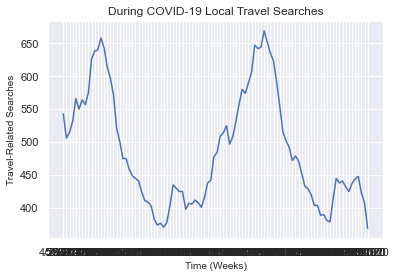

In [219]:
# Let us visualize our data from weekly search counts.
p = sns.lineplot(data=df, y="sum", x="Week")
p.set_title("During COVID-19 Local Travel Searches")
p.set_xlabel("Time (Weeks)", fontsize = 10)
p.set_ylabel("Travel-Related Searches", fontsize = 10)

In [220]:
# Let us calculate the rolling data for our time series data.
rolling_mean = df["sum"].rolling(5).mean()
rolling_std = df["sum"].rolling(5).std()

# print(rolling_mean)
# print(rolling_std)

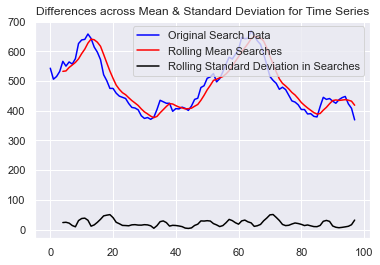

In [221]:
# Let us visualize the actual data and compare it against the rolling mean and standard deviation.
plt.plot(df["sum"], color="blue",label="Original Search Data")
plt.plot(rolling_mean, color="red", label= "Rolling Mean Searches")
plt.plot(rolling_std, color="black", label = "Rolling Standard Deviation in Searches")
plt.title("Differences across Mean & Standard Deviation for Time Series")
plt.legend(loc="best")

In [223]:
# Let us create an AIC estimator to see how the overall trends of the data.
adft = adfuller(df["sum"], autolag="AIC")

In [224]:
# Let us now gather some data from the AIC estimator.
output_NewInterndf = pd.DataFrame({"Values":[adft[0],adft[1],adft[2], 
                                    adft[3], adft[4]['1%'], 
                    adft[4]['5%'], adft[4]['10%']] , "Metric":["Test Statistics","p-value",
                    "No. of lags used", "Number of observations used", "critical value (1%)",                                          
                    "critical value (5%)", "critical value (10%)"]})

print(output_NewInterndf)

      Values                       Metric
0  -1.690658              Test Statistics
1   0.435932                      p-value
2   2.000000             No. of lags used
3  95.000000  Number of observations used
4  -3.501137          critical value (1%)
5  -2.892480          critical value (5%)
6  -2.583275         critical value (10%)


In [199]:
# Let us calculate month-based lag on the estimator.
autocorrelation_lag1 = df['sum'].autocorr(lag=1)
                          
print("One Month Lag: ", autocorrelation_lag1)

autocorrelation_lag3 = df['sum'].autocorr(lag=3)
                          
print("Three Month Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = df['sum'].autocorr(lag=6)
                          
print("Six Month Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = df['sum'].autocorr(lag=9)
                          
print("Nine Month Lag: ", autocorrelation_lag9)

One Month Lag:  0.9741741716326817
Three Month Lag:  0.868502319602359
Six Month Lag:  0.6359129128495713
Nine Month Lag:  0.3612926619954234


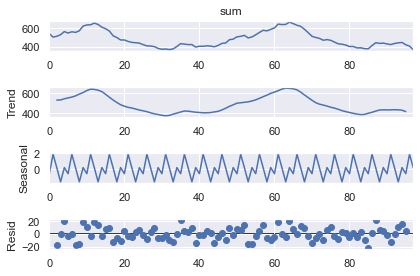

In [225]:
# Let us gather some information that de-seasonalize the data.
decompose = seasonal_decompose(df['sum'],model='additive', period=5)

decompose.plot()
plt.show()

In [226]:
# Let us create a model that will forecast the trends of this specific dataset.
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)

model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=733.192, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1004.142, Time=0.73 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=753.337, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=909.965, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1301.381, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=740.954, Time=0.43 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=732.520, Time=0.33 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=744.089, Time=0.27 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=737.722, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=729.452, Time=0.62 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=734.828, Time=0.28 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=735.554, Time=0.68 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=736.132, Time=0.80 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=735.535, Time=0.33 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=737

<ipython-input-227-0d1bbae874ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Week'] = df.index
<ipython-input-227-0d1bbae874ac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['sum']
<ipython-input-227-0d1bbae874ac>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

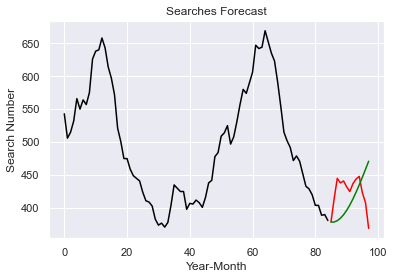

In [227]:
# Let us visualize the model prediction and compare it against the actual data.
df['Week'] = df.index
train = df[df['Week'] < 85]

train['train'] = train['sum']

del train['Week']

del train['sum']

test = df[df['Week'] >= 85]

del test['Week']

test['train'] = test['sum']

del test['sum']

plt.plot(train, color="black")

plt.plot(test, color="red")

plt.plot(forecast, color="green")

plt.title("Searches Forecast")

plt.ylabel("Search Number")

plt.xlabel('Year-Month')

sns.set()

plt.show()

In [228]:
# Let us calculate the mean squared error of our model's prediction.
rms = sqrt(mean_squared_error(test, forecast))
print("RMSE: ", rms)

RMSE:  45.72024888969269


In [240]:
mean = newdf['sum']

df = pd.read_csv("duringLocal.csv")
df["sum"] = df.sum(axis=1)
mean2 = df['sum']

In [233]:
# Let us calculate the confidence interval of our data.
cm = sms.CompareMeans(sms.DescrStatsW(mean), sms.DescrStatsW(forecast))
print(cm.tconfint_diff(usevar='unequal'))


(array([622.07321525]), array([723.66317077]))


In [241]:
# Let us calculate a 2 sample t-test for our data.
stats.ttest_ind(a=mean, b=mean2, equal_var=False)

Ttest_indResult(statistic=23.778676030106396, pvalue=2.8936210550573403e-50)